# KNN Regressor:

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
from sklearn.preprocessing import LabelEncoder

In [8]:
label = LabelEncoder()

In [9]:
df.Gender = label.fit_transform(df['Gender'])

In [10]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [11]:
x = df.drop('Weight', axis = 1)

In [12]:
y = df['Weight']

In [14]:
# Split train and test data
from sklearn.model_selection import train_test_split

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = .70 )

In [21]:
from sklearn.neighbors import KNeighborsRegressor

In [22]:
knn_reg = KNeighborsRegressor()

In [24]:
knn_reg.fit(xtrain,ytrain)

KNeighborsRegressor()

In [25]:
knn_reg.score(xtest, ytest)

0.8815882765355548

In [26]:
pred = knn_reg.predict(xtest)

In [27]:
pred

array([121.58417338, 189.03042412, 125.37398736, ..., 207.30655146,
       166.07463776, 197.59825024])

# Mean squared error

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
mse = mean_squared_error(ytest, pred)

In [30]:
mse

123.8429873634381

In [31]:
import math

In [32]:
rmse = math.sqrt(mse)

In [33]:
rmse

11.128476416987102

# Linear Regression

In [34]:
# Linear Regression
from sklearn.linear_model import LinearRegression

In [35]:
reg = LinearRegression()

In [36]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [37]:
reg.score(xtest, ytest)

0.9002985844756839

In [38]:
pred2 = reg.predict(xtest)

In [39]:
pred2

array([126.07462366, 183.3020895 , 127.03562184, ..., 207.68491242,
       163.24793079, 198.1086969 ])

In [40]:
mse2 = mean_squared_error(ytest, pred2)

In [41]:
mse2

104.27448213438277

In [42]:
rmse2 = math.sqrt(mse2)

In [43]:
rmse2

10.211487753230807

# Hyper Parameter Optimization

# Randomized Search CV

In [44]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

In [45]:
n_neighbors = np.random.randint(1, 200, 20)

# Create ids
grids = {'n_neighbors': n_neighbors
        }

In [46]:
knn_reg2 = KNeighborsRegressor()

In [47]:
rmcv = RandomizedSearchCV(knn_reg2, grids, n_iter=200, cv = 5)

In [48]:
rmcv.fit(xtrain, ytrain)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 20 is smaller than n_iter=200. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_iter=200,
                   param_distributions={'n_neighbors': array([142, 127,  79,  94, 192,  50,  44, 146,  83, 135, 167,  22,  71,
        74,  64, 190,  18, 102,  95, 182])})

In [49]:
rmcv.cv_results_

{'mean_fit_time': array([0.00599613, 0.00659604, 0.00599651, 0.00599656, 0.00579667,
        0.00619721, 0.00619764, 0.00619707, 0.00639648, 0.00599689,
        0.00599461, 0.00599756, 0.00599732, 0.00579529, 0.00559573,
        0.00619664, 0.00599766, 0.00559721, 0.00619683, 0.00639997]),
 'std_fit_time': array([1.02934995e-06, 1.02065581e-03, 6.32032776e-04, 1.16800773e-07,
        3.99828426e-04, 3.99708787e-04, 3.99732831e-04, 4.00018934e-04,
        4.90115616e-04, 4.62310777e-07, 6.27972187e-04, 5.13569337e-07,
        4.15696997e-07, 4.00091962e-04, 4.89531937e-04, 3.99757153e-04,
        3.01578299e-07, 4.89181163e-04, 3.99303522e-04, 4.93429138e-04]),
 'mean_score_time': array([0.02679348, 0.02618995, 0.01619644, 0.01879616, 0.03439298,
        0.01159663, 0.01059704, 0.02798872, 0.01659651, 0.02559528,
        0.03019409, 0.00699787, 0.01459627, 0.01459908, 0.01339879,
        0.03379006, 0.00679793, 0.02019477, 0.01879563, 0.03258734]),
 'std_score_time': array([7.48201218e-

In [50]:
results = pd.DataFrame(rmcv.cv_results_)

In [51]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005996,1.029350e-06,0.026793,7.482012e-04,142,{'n_neighbors': 142},0.894863,0.896859,0.884213,0.893330,0.896346,0.893122,0.004622,15
1,0.006596,1.020656e-03,0.026190,2.987521e-03,127,{'n_neighbors': 127},0.895460,0.897097,0.884788,0.893689,0.897151,0.893637,0.004603,12
2,0.005997,6.320328e-04,0.016196,3.997326e-04,79,{'n_neighbors': 79},0.897704,0.898395,0.886988,0.895196,0.898279,0.895313,0.004320,6
3,0.005997,1.168008e-07,0.018796,7.474236e-04,94,{'n_neighbors': 94},0.897305,0.898012,0.886152,0.894584,0.898445,0.894900,0.004575,8
4,0.005797,3.998284e-04,0.034393,4.875544e-04,192,{'n_neighbors': 192},0.892201,0.894328,0.881436,0.890992,0.893599,0.890511,0.004681,20
5,0.006197,3.997088e-04,0.011597,4.901351e-04,50,{'n_neighbors': 50},0.897907,0.898566,0.886905,0.895900,0.898695,0.895595,0.004458,4
6,0.006198,3.997328e-04,0.010597,4.898235e-04,44,{'n_neighbors': 44},0.897880,0.898658,0.887031,0.896399,0.899158,0.895825,0.004495,1
7,0.006197,4.000189e-04,0.027989,1.550384e-03,146,{'n_neighbors': 146},0.894603,0.896758,0.883981,0.893105,0.896128,0.892915,0.004643,16
8,0.006396,4.901156e-04,0.016597,7.998112e-04,83,{'n_neighbors': 83},0.897669,0.898160,0.886800,0.894939,0.898392,0.895192,0.004374,7
9,0.005997,4.623108e-07,0.025595,4.860868e-04,135,{'n_neighbors': 135},0.895010,0.897032,0.884426,0.893563,0.896611,0.893328,0.004618,13


In [52]:
rmcv.best_params_

{'n_neighbors': 44}

In [53]:
rmcv.best_estimator_

KNeighborsRegressor(n_neighbors=44)

In [54]:
rmcv.best_score_

0.8958250917560895

In [55]:
best = rmcv.best_estimator_

In [56]:
best.score(xtest, ytest)

0.8972539833172211

# Use GridSearchCV

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
gscv = GridSearchCV(knn_reg2, grids, cv=3)

In [59]:
gscv.fit(xtrain, ytrain)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([142, 127,  79,  94, 192,  50,  44, 146,  83, 135, 167,  22,  71,
        74,  64, 190,  18, 102,  95, 182])})

In [60]:
gscv.cv_results_

{'mean_fit_time': array([0.0059967 , 0.00533072, 0.00599734, 0.0059975 , 0.00533088,
        0.00533096, 0.00566379, 0.0056603 , 0.00733034, 0.00566395,
        0.00533096, 0.0056649 , 0.00533104, 0.00533128, 0.00599726,
        0.00533088, 0.0063262 , 0.00532897, 0.00566355, 0.00533104]),
 'std_fit_time': array([1.41293103e-03, 4.71932673e-04, 1.12391596e-07, 1.12391596e-07,
        4.71314168e-04, 4.71258605e-04, 4.70977074e-04, 4.68359084e-04,
        1.24772345e-03, 4.71426560e-04, 4.71426801e-04, 4.71258002e-04,
        4.71539032e-04, 4.71201776e-04, 2.97360213e-07, 4.71652146e-04,
        4.73923164e-04, 4.71145731e-04, 4.70976993e-04, 4.71876206e-04]),
 'mean_score_time': array([0.04365333, 0.03832698, 0.0286576 , 0.0289917 , 0.05431819,
        0.01766276, 0.01632945, 0.05131721, 0.03732133, 0.04265404,
        0.05065544, 0.01032996, 0.02299341, 0.02366002, 0.02132718,
        0.05464975, 0.01033076, 0.03532918, 0.02932509, 0.05298313]),
 'std_score_time': array([9.42348186e-

In [61]:
result2 = pd.DataFrame(gscv.cv_results_)

In [62]:
result2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005997,1.412931e-03,0.043653,9.423482e-04,142,{'n_neighbors': 142},0.893404,0.887952,0.893933,0.891763,0.002703,15
1,0.005331,4.719327e-04,0.038327,4.781139e-04,127,{'n_neighbors': 127},0.894311,0.888800,0.894955,0.892689,0.002762,13
2,0.005997,1.123916e-07,0.028658,5.183781e-03,79,{'n_neighbors': 79},0.896671,0.890870,0.897670,0.895070,0.002998,8
3,0.005997,1.123916e-07,0.028992,8.920806e-07,94,{'n_neighbors': 94},0.896155,0.890222,0.896810,0.894396,0.002963,10
4,0.005331,4.713142e-04,0.054318,4.703595e-04,192,{'n_neighbors': 192},0.889709,0.885103,0.890620,0.888477,0.002415,20
5,0.005331,4.712586e-04,0.017663,4.700217e-04,50,{'n_neighbors': 50},0.897227,0.891613,0.898491,0.895777,0.002989,2
6,0.005664,4.709771e-04,0.016329,4.707523e-04,44,{'n_neighbors': 44},0.897467,0.891277,0.898665,0.895803,0.003238,1
7,0.005660,4.683591e-04,0.051317,9.659856e-03,146,{'n_neighbors': 146},0.893166,0.887701,0.893725,0.891531,0.002718,16
8,0.007330,1.247723e-03,0.037321,7.037085e-03,83,{'n_neighbors': 83},0.896512,0.890568,0.897486,0.894856,0.003057,9
9,0.005664,4.714266e-04,0.042654,9.431387e-04,135,{'n_neighbors': 135},0.893967,0.888459,0.894341,0.892255,0.002689,14


In [63]:
gscv.best_score_

0.8958029760661083

In [64]:
gscv.best_estimator_

KNeighborsRegressor(n_neighbors=44)

In [65]:
best2 = gscv.best_estimator_

In [66]:
best2.score(xtest, ytest)

0.8972539833172211

In [67]:
gscv.best_estimator_

KNeighborsRegressor(n_neighbors=44)

# KNN Classifier with Python

In [68]:
df = pd.read_csv('weight-height.csv')

In [69]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

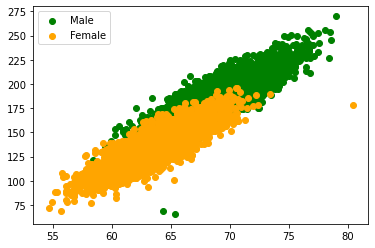

In [77]:
df0 = df[ df.Gender=='Male']
df1 = df[ df.Gender=='Female']

plt.scatter(df0['Height'],df0['Weight'],color='green',label='Male')
plt.scatter(df1['Height'],df1['Weight'],color='orange',label='Female')

plt.legend()

In [78]:
df['Gender'] = df.Gender.replace({'Male':0, 'Female':1})

In [79]:
x = df.drop(['Gender'], axis=1)

In [80]:
y = df.Gender

In [81]:
x.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [82]:
# split train and test data
from sklearn.model_selection import train_test_split

In [84]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=.70)

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
knn2 = KNeighborsClassifier()

In [87]:
knn2.fit(xtrain, ytrain)

KNeighborsClassifier()

In [88]:
knn2.score(xtest, ytest)

0.9100116867939229

In [89]:
knn2.predict(xtest)

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [90]:
xtest.head()

,Height,Weight
7744,64.678780,131.652285
6931,67.552404,160.726511
6900,63.516500,120.810049
714,69.793888,181.723193
7618,64.520431,138.789809


# Tuning

In [96]:
knn3 = KNeighborsClassifier()

# Randomized Search CV

In [98]:
rs2 = RandomizedSearchCV(knn3, grids, n_iter=200, cv=5)

In [99]:
rs2.fit(xtrain, ytrain)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 20 is smaller than n_iter=200. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=200,
                   param_distributions={'n_neighbors': array([142, 127,  79,  94, 192,  50,  44, 146,  83, 135, 167,  22,  71,
        74,  64, 190,  18, 102,  95, 182])})

In [100]:
rs2.cv_results_

{'mean_fit_time': array([0.00239663, 0.00624957, 0.00312495, 0.00312424, 0.00624995,
        0.        , 0.003125  , 0.01249886, 0.00724921, 0.00199614,
        0.00586891, 0.00572672, 0.01369834, 0.00645623, 0.00884871,
        0.00625081, 0.00532179, 0.00312538, 0.00745006, 0.00625033]),
 'std_fit_time': array([0.00293526, 0.00765413, 0.0062499 , 0.00624847, 0.0076546 ,
        0.        , 0.00625   , 0.00624943, 0.00707716, 0.00244476,
        0.00045678, 0.00581901, 0.0038507 , 0.0074935 , 0.00602785,
        0.00765565, 0.0057157 , 0.00625076, 0.00702586, 0.00765506]),
 'mean_score_time': array([0.06123061, 0.04999604, 0.04687014, 0.05098653, 0.06286721,
        0.04686809, 0.03749661, 0.05624547, 0.04366522, 0.06330061,
        0.06033092, 0.04067612, 0.07095728, 0.06363544, 0.05258012,
        0.06249352, 0.0322104 , 0.04999514, 0.04617405, 0.0656796 ]),
 'std_score_time': array([8.11594347e-03, 6.24923718e-03, 1.45102730e-06, 6.06906164e-03,
        7.39210234e-04, 5.36944895e-

In [101]:
results = pd.DataFrame(rs2.cv_results_)

In [102]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002397,0.002935,0.061231,0.008116,142,{'n_neighbors': 142},0.910684,0.923205,0.897329,0.918129,0.918129,0.913495,0.009016,14
1,0.006250,0.007654,0.049996,0.006249,127,{'n_neighbors': 127},0.913189,0.924040,0.897329,0.918964,0.918129,0.914330,0.009171,13
2,0.003125,0.006250,0.046870,0.000001,79,{'n_neighbors': 79},0.918197,0.924040,0.900668,0.921470,0.918964,0.916668,0.008259,5
3,0.003124,0.006248,0.050987,0.006069,94,{'n_neighbors': 94},0.914858,0.925710,0.900668,0.919799,0.918129,0.915833,0.008360,10
4,0.006250,0.007655,0.062867,0.000739,192,{'n_neighbors': 192},0.911519,0.918197,0.893155,0.911445,0.914787,0.909821,0.008696,19
5,0.000000,0.000000,0.046868,0.000005,50,{'n_neighbors': 50},0.919032,0.921536,0.904007,0.922306,0.920635,0.917503,0.006836,2
6,0.003125,0.006250,0.037497,0.007654,44,{'n_neighbors': 44},0.916528,0.923205,0.902337,0.924812,0.920635,0.917503,0.008083,1
7,0.012499,0.006249,0.056245,0.012497,146,{'n_neighbors': 146},0.909850,0.923205,0.897329,0.915622,0.917293,0.912660,0.008768,17
8,0.007249,0.007077,0.043665,0.009993,83,{'n_neighbors': 83},0.919032,0.924040,0.900668,0.921470,0.918129,0.916668,0.008260,6
9,0.001996,0.002445,0.063301,0.004911,135,{'n_neighbors': 135},0.910684,0.923205,0.897329,0.918129,0.917293,0.913328,0.008936,15


In [103]:
rs2.best_params_

{'n_neighbors': 44}

In [104]:
rs2.best_estimator_

KNeighborsClassifier(n_neighbors=44)

In [105]:
knn4 = rs2.best_estimator_

In [106]:
knn4.score(xtest, ytest)

0.9162446435527853